# Extra info
Lees ook https://builtin.com/data-science/step-step-explanation-principal-component-analysis

https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

# Setup

In [1]:
local = True
if local:
    datasetfolder = '../datasets/'
else:
    datasetfolder = '/content/datasets/'
#   #vervang dit naar het pad in Google Drive waar jouw project staat
#   projectFolder='/content/drive/Shareddrives/Data Science 1/2020-21/Lesmateriaal/10 principale componenten analyse/'
#   from google.colab import drive
#   !rm /content/datasets
#   #vervang dit naar het pad in Google Drive waar jouw datasets staat
#   !ln -s '/content/drive/Shareddrives/Data Science 1/2020-21/Lesmateriaal/10 principale componenten analyse/oefeningen/datasets/' "/content/datasets"
#   !ls /content/datasets
#   drive.mount('/content/drive')
#   import sys
#   import os
#   sys.path.append(os.path.abspath(projectFolder))
# print('de folder met datasets = ' + datasetfolder)

In [19]:
from IPython.core.display import display
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
from IPython.display import display
import math
import matplotlib
import matplotlib.pyplot as plt
import statistics
from scipy import stats
import scipy.spatial.distance as dist
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree, linkage
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Proteïnen
De onderstaande gegevens met betrekking tot de gemiddelde proteïneconsumptie komende van verschillende voedselbronnen door inwoners in 25 Europese landen, kan je terug vinden op Canvas (Protein consumption in 25 European countries.csv).

<font size=2>_Bron: Manly, Bryan and Navarro Alberto , Jorge (2017): Multivariate Statistical Methods A Primer, Fourth Edition, CRC Press_</font>

In [20]:
import pandas as pd

protein = pd.read_csv(datasetfolder + 'Protein consumption in 25 European countries.csv', index_col=0)

In [21]:
# keep
protein.head()
protein.dtypes
protein.info()
protein.describe()


,Comunist,Region,Red_Meat,White_Meat,Eggs,Milk,Fish,Cereal,Starch,Nuts,Fruits_Vegetables,Total
Country,,,,,,,,,,,,
Albania,Yes,South,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,71.2
Austria,No,Center,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,86.4
Belgium,No,Center,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,87.3
Bulgaria,Yes,South,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,90.6
Czechoslovakia,Yes,Center,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,82.8


Comunist              object
Region                object
Red_Meat             float64
White_Meat           float64
Eggs                 float64
Milk                 float64
Fish                 float64
Cereal               float64
Starch               float64
Nuts                 float64
Fruits_Vegetables    float64
Total                float64
dtype: object

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Albania to Yugoslavia
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Comunist           25 non-null     object 
 1   Region             25 non-null     object 
 2   Red_Meat           25 non-null     float64
 3   White_Meat         25 non-null     float64
 4   Eggs               25 non-null     float64
 5   Milk               25 non-null     float64
 6   Fish               25 non-null     float64
 7   Cereal             25 non-null     float64
 8   Starch             25 non-null     float64
 9   Nuts               25 non-null     float64
 10  Fruits_Vegetables  25 non-null     float64
 11  Total              25 non-null     float64
dtypes: float64(10), object(2)
memory usage: 2.5+ KB


,Red_Meat,White_Meat,Eggs,Milk,Fish,Cereal,Starch,Nuts,Fruits_Vegetables,Total
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,9.828000,7.896000,2.936000,17.112000,4.284000,32.248000,4.276000,3.072000,4.136000,85.788000
std,3.347078,3.694081,1.117617,7.105416,3.402533,10.974786,1.634085,1.985682,1.803903,6.755758
min,4.400000,1.400000,0.500000,4.900000,0.200000,18.600000,0.600000,0.700000,1.400000,71.200000
25%,7.800000,4.900000,2.700000,11.100000,2.100000,24.300000,3.100000,1.500000,2.900000,81.700000
50%,9.500000,7.800000,2.900000,17.600000,3.400000,28.000000,4.700000,2.400000,3.800000,86.900000
75%,10.600000,10.800000,3.700000,23.300000,5.800000,40.100000,5.700000,4.700000,4.900000,90.400000
max,18.000000,14.000000,4.700000,33.700000,14.200000,56.700000,6.500000,7.800000,7.900000,98.200000


 a.	Plaats de gegevens in een dataframe. Gebruik daarbij de namen van de landen die in de eerste kolom staan als index.

In [22]:
# zie intro => index_col=0


b.	Welke kolommen dien je te verwijderen om een Principale-Componenten Analyse te kunnen uitvoeren?

_Tip:  Verwijder eventuele kolommen met de verkeerde meetschaal, kolommen die niet zinvol zijn, afhankelijk zijn …._

In [23]:
protein.info()
protein.drop(columns=['Comunist', 'Region', 'Total'], inplace=True)  # nominaal en afhankelijk
protein.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Albania to Yugoslavia
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Comunist           25 non-null     object 
 1   Region             25 non-null     object 
 2   Red_Meat           25 non-null     float64
 3   White_Meat         25 non-null     float64
 4   Eggs               25 non-null     float64
 5   Milk               25 non-null     float64
 6   Fish               25 non-null     float64
 7   Cereal             25 non-null     float64
 8   Starch             25 non-null     float64
 9   Nuts               25 non-null     float64
 10  Fruits_Vegetables  25 non-null     float64
 11  Total              25 non-null     float64
dtypes: float64(10), object(2)
memory usage: 2.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Albania to Yugoslavia
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
--- 

c.	Bekijk de correlaties tussen de variabelen. Zijn de gegevens bruikbaar om er een Principale-Componenten Analyse op toe te passen?

In [24]:
# De correlaties (in absolute waarde) tussen de verschillende variabelen mogen niet te laag (m.a.w. dicht bij nul) zijn.
# De gegevens moeten allen op ratio schaal gemeten zijn.
protein.corr()


,Red_Meat,White_Meat,Eggs,Milk,Fish,Cereal,Starch,Nuts,Fruits_Vegetables
Red_Meat,1.000000,0.153003,0.585609,0.502931,0.060957,-0.499877,0.135426,-0.349449,-0.074221
White_Meat,0.153003,1.000000,0.620409,0.281484,-0.234009,-0.413797,0.313772,-0.634962,-0.061317
Eggs,0.585609,0.620409,1.000000,0.575533,0.065571,-0.712437,0.452231,-0.559781,-0.045518
Milk,0.502931,0.281484,0.575533,1.000000,0.137884,-0.592737,0.222411,-0.621087,-0.408364
Fish,0.060957,-0.234009,0.065571,0.137884,1.000000,-0.524231,0.403853,-0.147153,0.266139
Cereal,-0.499877,-0.413797,-0.712437,-0.592737,-0.524231,1.000000,-0.533262,0.650997,0.046548
Starch,0.135426,0.313772,0.452231,0.222411,0.403853,-0.533262,1.000000,-0.474312,0.084410
Nuts,-0.349449,-0.634962,-0.559781,-0.621087,-0.147153,0.650997,-0.474312,1.000000,0.374970
Fruits_Vegetables,-0.074221,-0.061317,-0.045518,-0.408364,0.266139,0.046548,0.084410,0.374970,1.000000


d.	Voer een Principale-Componenten Analyse uit en interpreteer de resultaten. Vergeet niet dat je de gegevens eerst moet standardiseren. Je kan hier best een pipeline voor aanmaken met een StandardScaler

In [25]:
X = protein.dropna()
model = make_pipeline(StandardScaler(), PCA())
model.fit(X)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

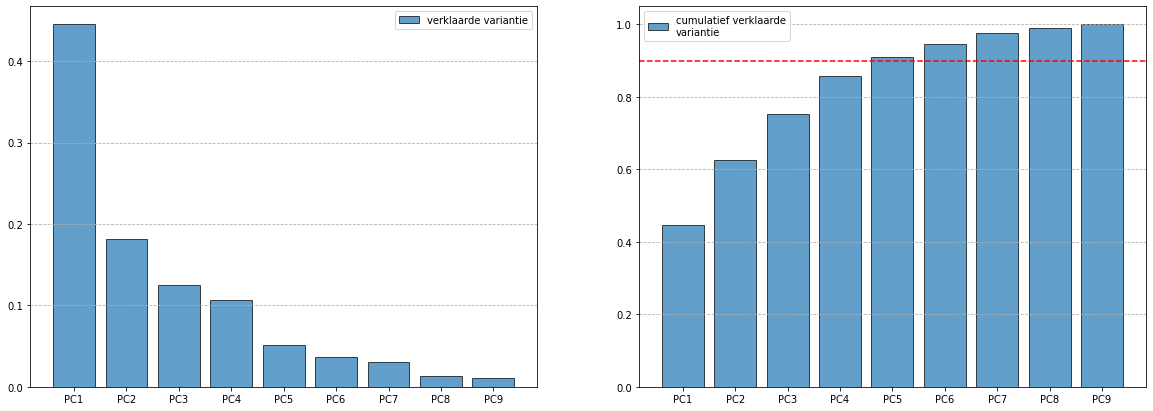

In [26]:
from scripts.pca_hulpfuncties import *

plot_pca(model['pca'])

e.	Zijn er een of meerdere variabelen die uitgesproken doorweegt in het bepalen van de eerste hoofdcomponent? Zo ja welke?

In [27]:
pca_eigenvector(X)
# Eggs, Nuts & Cereal op PC1
# Fish & Fruits_Vegetables op PC2

,Red_Meat,White_Meat,Eggs,Milk,Fish,Cereal,Starch,Nuts,Fruits_Vegetables
PC1,-0.302609,-0.310556,-0.426679,-0.377727,-0.135650,0.437743,-0.297248,0.420334,0.110420
PC2,-0.056252,-0.236853,-0.035336,-0.184589,0.646820,-0.233485,0.352826,0.143311,0.536190
PC3,0.297580,-0.623897,-0.181528,0.385658,0.321274,-0.095918,-0.242975,0.054388,-0.407556
PC4,0.646477,-0.036992,0.313164,-0.003318,-0.215955,-0.006204,-0.336685,0.330288,0.462056
PC5,0.322160,-0.300165,0.079110,-0.200414,-0.290031,0.238168,0.735973,0.150537,-0.233517
PC6,-0.459870,-0.121007,0.361249,0.618438,-0.136791,0.080758,0.147667,0.447010,0.118550
PC7,0.150334,-0.019664,-0.443272,0.462095,-0.106394,0.404964,0.152753,-0.407262,0.449978
PC8,0.019858,0.027876,0.491200,-0.081422,0.448732,0.702995,-0.114540,-0.183800,-0.091963
PC9,-0.246000,-0.592397,0.333386,-0.178084,-0.312826,-0.152260,-0.121858,-0.518275,0.202950


f.	Maak een biplot. Welke landen horen bij elkaar? Vind je dit verrassend?

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [9] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [7] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


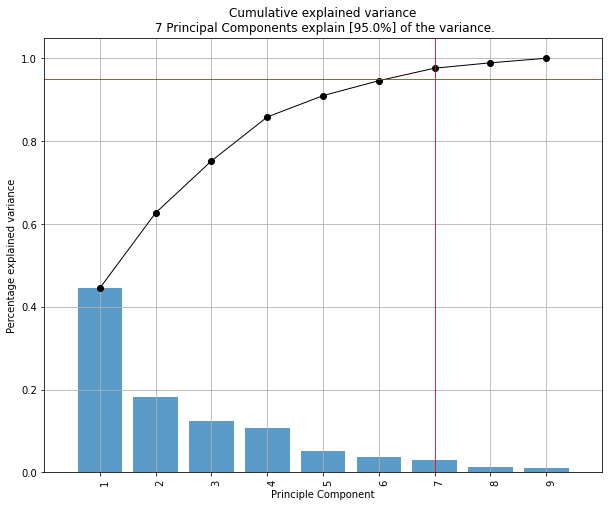

<Figure size 432x288 with 0 Axes>

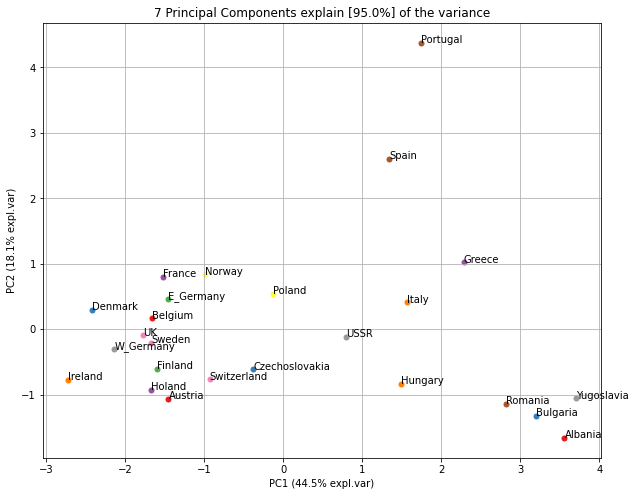

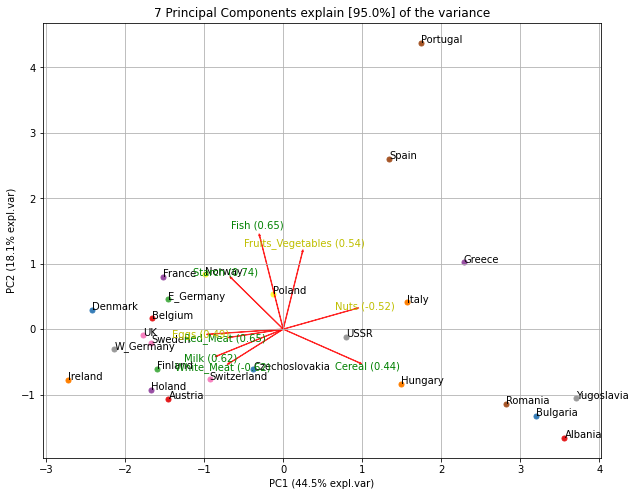

In [28]:
# !pip install pca
from pca import pca

model = pca(normalize=True)
_ = model.fit_transform(X)
_ = model.plot()
_ = model.scatter(legend=False)
_ = model.biplot(legend=False)

g.	Maak een nieuw dataframe aan waarbij we voor de observaties de eerste drie hoofdcomponenten nemen.

In [29]:
model = pca(n_components=3, normalize=True)
out = model.fit_transform(X, verbose=False)
out['PC']

,PC1,PC2,PC3
Albania,3.557238,-1.664102,1.797551
Austria,-1.452006,-1.062702,-1.365390
Belgium,-1.655480,0.162784,-0.221000
Bulgaria,3.198708,-1.327895,-0.154409
Czechoslovakia,-0.378104,-0.615096,-1.220603
Denmark,-2.414042,0.291332,0.767776
E_Germany,-1.451538,0.459586,-1.329399
Finland,-1.596104,-0.608293,2.091770
France,-1.518666,0.801560,-0.001921
Greece,2.285884,1.021701,0.900803


h.	Pas hier een hiërarchische cluster analyse op toe (euclidische afstand). Vergelijk de resultaten met de resultaten bekomen met een cluster analyse toegepast op de oorspronkelijke variabelen. Welke landen horen samen?

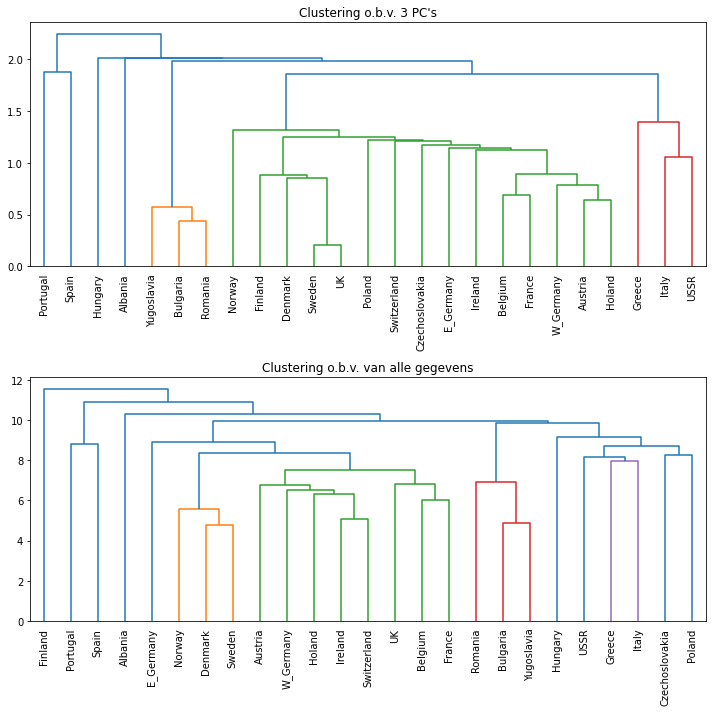

In [30]:
from scipy.cluster.hierarchy import linkage, dendrogram

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
distances = linkage(out['PC'], method='single')
dgram = dendrogram(distances,
                   labels=out['PC'].index,
                   leaf_rotation=90,
                   ax=axes[0])
_ = axes[0].set_title('Clustering o.b.v. 3 PC\'s')

distances = linkage(X, method='single')
dgram = dendrogram(distances,
                   labels=X.index,
                   leaf_rotation=90,
                   ax=axes[1])
_ = axes[1].set_title('Clustering o.b.v. van alle gegevens')
_ = fig.tight_layout()

i. Vergelijk tot slot ook even de biplots. Kom je hier ook tot dezelfde conclusies?

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


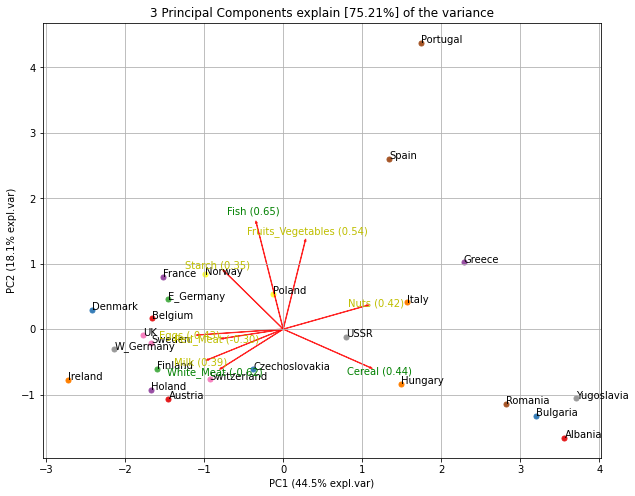

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [9] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [7] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


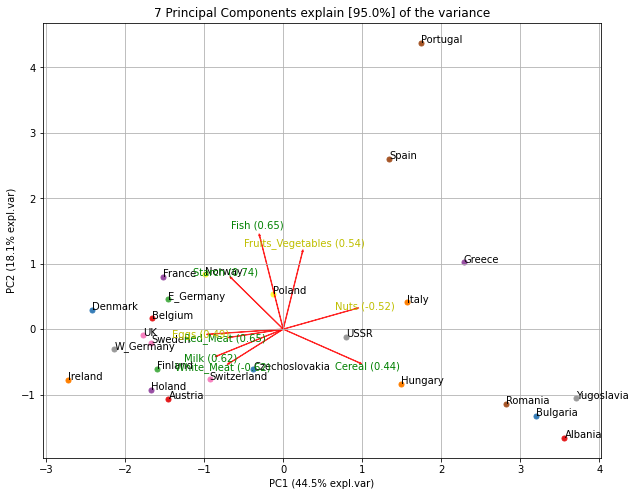

In [31]:
model = pca(n_components=3, normalize=True)
_ = model.fit_transform(X)
_ = model.biplot(legend=False)

model = pca(normalize=True)
_ = model.fit_transform(X)
_ = model.biplot(legend=False)

# Onderscheid tussen de oost-europese, west-europese, zuid-europese landen is duidelijk, zowel in de clustering als in de biplot

